In [3]:
import numpy as np
from matplotlib import pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [4]:
def KNNClassifier(train_data, train_label, test_data, test_label):
    neighbours = [1, 3, 5, 7]
    accuracy_matrix = []
    for i, neighbour in zip(range(len(neighbours)), neighbours):
        print("When Neighbour = " + "[" + str(neighbour) + "]")
        clf = KNeighborsClassifier(n_neighbors=neighbour, weights='distance') 
        clf.fit(train_data.T, train_label) #Trains the classifier on the training data.
        output = clf.predict(test_data.T)   #Predicts labels for the test data.
        accuracy_matrix.append(accuracy_score(output, test_label))   # Appends the accuracy score to the list.
        print("Accuracy score is: " + str(accuracy_matrix[i]))
        count = 0
        for i in range(len(output)):
            print("[" + str(i) + "]" + "Classified as: "+ str(output[i]) +" Actual is: "+ str(test_label[i]))
            if output[i] != test_label[i]:
                print("Misclassified")
                count += 1
        print("Number of Misclassified is " + str(count))
        print("=========================================")
    plt.plot(neighbours, accuracy_matrix)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy')
    plt.show()

In [5]:
def Read_pgm(dir_name):
    first_dir = False
    full_list = []
    labels = []
    for root, dirs, files in os.walk(dir_name):
        if not first_dir:
            first_dir = True
            continue
        for file in files:
            if file.endswith('.pgm') and not file.startswith('._'):
                file_path = join(root, file)
                try:
                    label = int(root.split(os.sep)[-1][1:])
                    labels.append(label)
                    full_list.append(np.array(Image.open(file_path)).reshape((10304)))
                except ValueError as e:
                    print(f"Error extracting label from file path: {file_path}")
                    raise e
                except Exception as e:
                    print(f"Error reading image file: {file_path}")
                    raise e
    return np.asarray(full_list, dtype="int32"), np.asarray(labels, dtype="int32")

In [6]:
def FTV(r, alpha, e_values):
    for i in range(r, 10304):
        b = float(sum(e_values))
        t = float(sum(e_values[:i]))
        if (t / b) >= alpha:
            return i
    print('SOMETHING WENT WRONG')

# Correcting the file path
full_list, labels = Read_pgm(r"C:\Users\PC\Documents\MACHINE LEARNING\archive")

# Splitting Data into train and test
test_data_matrix = []
test_label_matrix = []
train_data_matrix = []
train_label_matrix = []

for i, index in zip(range(400), range(400)):
    if i % 2 == 1:
        test_data_matrix.append(full_list[index])
        test_label_matrix.append(labels[index])
    else:
        train_data_matrix.append(full_list[index])
        train_label_matrix.append(labels[index])

test_data_matrix = np.asarray(test_data_matrix, dtype="int32")
test_label_matrix = np.asarray(test_label_matrix, dtype="int32")
train_data_matrix = np.asarray(train_data_matrix, dtype="int32")
train_label_matrix = np.asarray(train_label_matrix, dtype="int32")

For r: 0.8
When Neighbour = [1]
Accuracy score is: 0.945
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 38 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 38 Actual is: 10
Misclassified
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 11 Actual is: 11
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 14 Actual is: 14

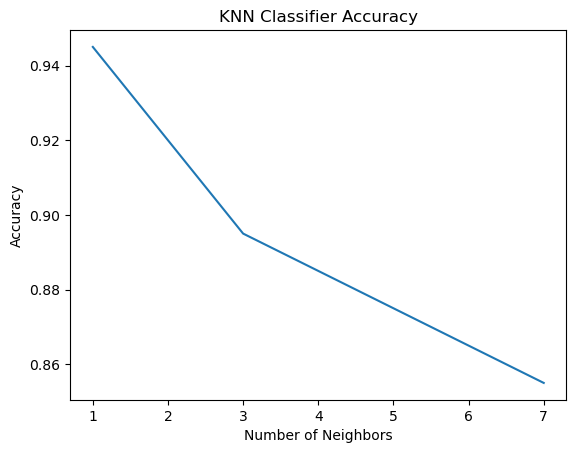

For r: 0.85
When Neighbour = [1]
Accuracy score is: 0.935
[0]Classified as: 17 Actual is: 1
Misclassified
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 38 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 38 Actual is: 10
Misclassified
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 11 Actual is: 11
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 

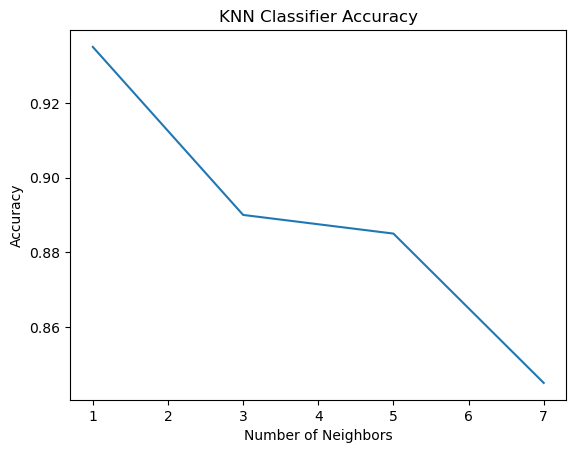

For r: 0.9
When Neighbour = [1]
Accuracy score is: 0.93
[0]Classified as: 17 Actual is: 1
Misclassified
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 38 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 38 Actual is: 10
Misclassified
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 11 Actual is: 11
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 14

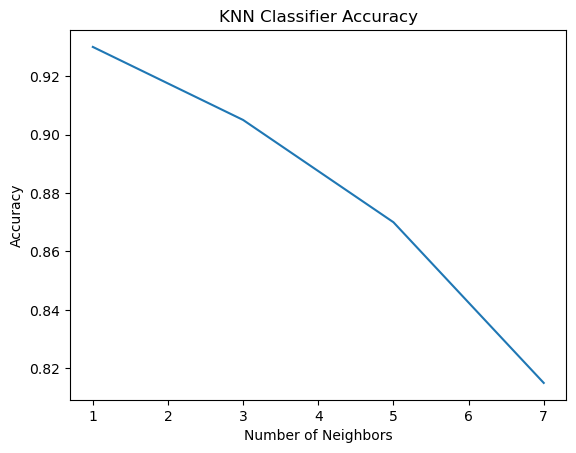

For r: 0.95
When Neighbour = [1]
Accuracy score is: 0.935
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 38 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 38 Actual is: 10
Misclassified
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 11 Actual is: 11
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 14 Actual is: 1

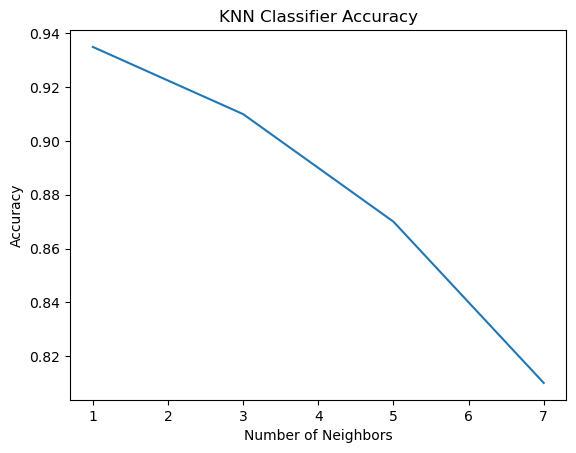

In [7]:
def PCA():
    mean = np.mean(train_data_matrix, axis=0)
    z_matrix = train_data_matrix - mean
    z_matrix_test = test_data_matrix - np.mean(test_data_matrix, axis=0)
    cov_matrix = np.cov(z_matrix, rowvar=0, bias=1)
    e_values, e_vectors = np.linalg.eigh(cov_matrix)
    idx = e_values.argsort()[::-1]
    e_values_sorted = e_values[idx]
    e_vectors_sorted = e_vectors[:, idx]
    r_values = [0.8, 0.85, 0.9, 0.95]
    for r in r_values:
        r_value = FTV(0, r, e_values_sorted)
        new_matrix = e_vectors_sorted[:, 0:r_value + 1]
        u_train = np.dot(new_matrix.T, z_matrix.T)
        u_test = np.dot(new_matrix.T, z_matrix_test.T)
        print("For r: " + str(r))
        KNNClassifier(u_train, train_label_matrix, u_test, test_label_matrix)

PCA()


In [8]:
def LDA (matrix, number_of_classes):
  LDA_matrix = []
  for i in range(40):
    LDA_matrix.append([])
  j = -1
  for i in range(200):
    if (i % 5 == 0):
      j = j + 1
    LDA_matrix[j].append(matrix[i])
  LDA_matrix = np.asarray(LDA_matrix, dtype="int32")
  
  sb = np.zeros((10304, 10304), dtype = np.float32)
  z = np.zeros((40, 5, 10304),  dtype = np.float32)
  si = np.zeros((10304, 10304), dtype = np.float32)
  s = 0
  mean = np.zeros((40,10304), dtype = np.float32)
  mean = (np.mean(LDA_matrix, axis = 1))
  overall_mean = np.mean(mean, axis = 0)

  for i in range (number_of_classes):   
      sb += (5 * (np.dot((mean[i] - overall_mean).T, (mean[i] - overall_mean))))

  for i in range (number_of_classes):
      z[i] = (LDA_matrix[i] - mean[i])

  for i in range (number_of_classes):
      si += (np.dot(z[i].T, z[i]))

  si = np.asarray(si)
  sinv = np.linalg.inv(si)
  sinv_b = np.matmul(sinv, sb)
  e_values_LDA , e_vectors_LDA = np.linalg.eig(sinv_b)
  idx = e_values_LDA.argsort()[::-1]
  e_values_sorted = e_values_LDA[idx]
  e_vectors_sorted = e_vectors_LDA[:,idx]
  u_train_LDA = np.dot(train_data_matrix, e_vectors_LDA)
  u_test_LDA = np.dot(test_data_matrix, e_vectors_LDA)
  KNNClassifier(u_train_LDA.real.T, train_label_matrix, u_test_LDA.real.T, test_label_matrix)

When Neighbour = [1]
Accuracy score is: 0.91
[0]Classified as: 17 Actual is: 1
Misclassified
[1]Classified as: 2 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 4 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 38 Actual is: 10
Misclassified
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 11 Actual is: 11
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 

Accuracy score is: 0.8
[0]Classified as: 17 Actual is: 1
Misclassified
[1]Classified as: 2 Actual is: 1
Misclassified
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 8 Actual is: 10
Misclassified
[6]Classified as: 10 Actual is: 10
[7]Classified as: 10 Actual is: 10
[8]Classified as: 10 Actual is: 10
[9]Classified as: 10 Actual is: 10
[10]Classified as: 11 Actual is: 11
[11]Classified as: 11 Actual is: 11
[12]Classified as: 19 Actual is: 11
Misclassified
[13]Classified as: 11 Actual is: 11
[14]Classified as: 11 Actual is: 11
[15]Classified as: 12 Actual is: 12
[16]Classified as: 12 Actual is: 12
[17]Classified as: 12 Actual is: 12
[18]Classified as: 12 Actual is: 12
[19]Classified as: 12 Actual is: 12
[20]Classified as: 13 Actual is: 13
[21]Classified as: 13 Actual is: 13
[22]Classified as: 13 Actual is: 13
[23]Classified as: 13 Actual is: 13
[24]Classified as: 13 Actual is: 13
[25]Classified as: 14 Actual is: 14
[26]C

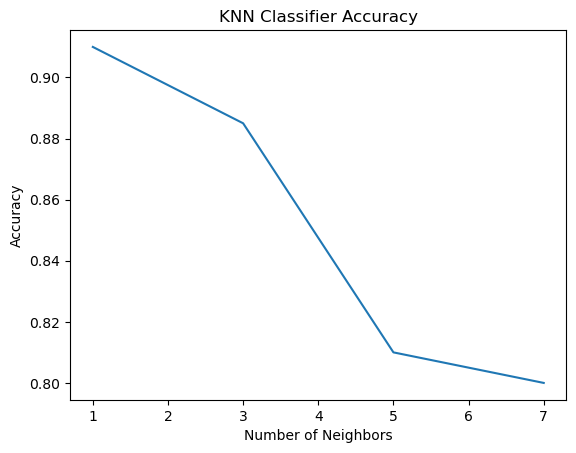

In [9]:
LDA((train_data_matrix), 39)

In [8]:
import os
import numpy as np
from PIL import Image

# Paths to the dataset folders
nonface_dataset_path = r"C:\Users\PC\Documents\MACHINE LEARNING\nonface_archive\nonface_archive"
face_dataset_path = r"C:\Users\PC\Documents\MACHINE LEARNING\archive"

# Function to check directory existence and list contents
def list_directory_contents(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return []
    contents = os.listdir(path)
    print(f"Contents of {path}: {contents}")
    return contents

# Getting the list of directories in the dataset folders
nonface_dirs = list_directory_contents(nonface_dataset_path)
face_dirs = list_directory_contents(face_dataset_path)

# Initializing the data and labels
nonface_data, face_data = np.zeros((400, 10304)), np.zeros((400, 10304))
nonface_labels, face_labels = np.zeros((400, 1)), np.ones((400, 1))

# Loading face data
cnt = 0

base_path = face_dataset_path  # Path to the base directory containing subject directories
subject_prefix = "s"  # Prefix for the subject directories

# Generate paths for each subject directory
paths = [os.path.join(base_path, subject_prefix + str(i)) for i in range(1, 41)]

for path in paths:
    print(f"Processing directory: {path}")
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue
    files = os.listdir(path)
    for file in files:
        img_path = os.path.join(path, file)
        if not os.path.isfile(img_path):
            print(f"File not found: {img_path}")
            continue
        img = Image.open(img_path)
        np_img = np.array(img)  # Converting the image to a numpy array
        np_img = np_img.flatten()  # Flattening the image to a 1D vector of features
        face_data[cnt] = np_img  # Adding the image vector to the data matrix
        cnt += 1

# Loading nonface data
cnt = 0

base_path = nonface_dataset_path  # Path to the base directory containing subject directories
subject_prefix = "s"  # Prefix for the subject directories

# Generate paths for each subject directory
paths = [os.path.join(base_path, subject_prefix + str(i)) for i in range(1, 9)]

for path in paths:
    print(f"Processing directory: {path}")
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue
    files = os.listdir(path)
    for file in files:
        img_path = os.path.join(path, file)
        if not os.path.isfile(img_path):
            print(f"File not found: {img_path}")
            continue
        img = Image.open(img_path)
        np_img = np.array(img)
        np_img = np_img.mean(axis=2)  # Converting the image to grayscale
        np_img = np_img.flatten()
        nonface_data[cnt] = np_img
        cnt += 1

# Shuffling the data
np.random.shuffle(face_data)
np.random.shuffle(nonface_data)

# Combining data and labels
data = np.vstack((face_data, nonface_data))
labels = np.vstack((face_labels, nonface_labels))

# Shuffling data and labels together
shuffled_indices = np.random.permutation(data.shape[0])
data = data[shuffled_indices]
labels = labels[shuffled_indices]

# Print shapes to verify correctness
print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")


Contents of C:\Users\PC\Documents\MACHINE LEARNING\nonface_archive\nonface_archive: ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
Contents of C:\Users\PC\Documents\MACHINE LEARNING\archive: ['README', 's1', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's2', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's3', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's4', 's40', 's5', 's6', 's7', 's8', 's9']
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s1
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s2
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s3
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s4
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s5
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s6
Processing directory: C:\Users\PC\Documents\MACHINE LEARNING\archive\s7
Processing directory:

In [9]:
def process_splits(face_data, nonface_data, face_labels, nonface_labels, nonface_cnt=len(nonface_data)):

    # Truncating nonface data to iterate over the given number of nonface images (nonface_cnt)
    # nonface_cnt = len(nonface_data) by default (all nonface images are used)
    nonface_data = nonface_data[ 0 : nonface_cnt ]

    # Combining face and nonface data
    data = np.append( face_data, nonface_data, axis=0 )
    labels = np.append( face_labels, nonface_labels, axis=0 )

    # Training set and labels are composed of elements at even indices
    training_set = data[ 0 : len(data) : 2 ]
    training_labels = labels[ 0 : len(data) : 2 ]

    # Test set and labels are composed of elements at odd indices
    test_set = data[ 1 : len(data) : 2 ]
    test_labels = labels[ 1 : len(data) : 2 ]

    return training_set, test_set, training_labels, test_labels

In [10]:
def LDA( training_set, h=False ):

    faces = training_set[ 0 : len(face_labels) // 2 ]
    nonfaces = training_set[ len(face_labels) // 2 : len(training_set) ]

    # Calculating the means of class-specific data (faces and non-faces)
    face_means = np.mean( faces, axis=0 )
    nonface_means = np.mean( nonfaces, axis=0 )

    # Reshaping to keep the dimensions consistent
    face_means = face_means.reshape( 1, 10304 )
    nonface_means = nonface_means.reshape( 1, 10304 )

    # Calculating the between-class scatter matrix
    B = np.dot( (face_means - nonface_means).T, (face_means - nonface_means) )

    # Centering the data
    centered_face_data = faces - face_means
    centered_nonface_data = nonfaces - nonface_means

    # Class scatter matrices
    Z1 = np.dot( centered_face_data.T, centered_face_data )
    Z2 = np.dot( centered_nonface_data.T, centered_nonface_data )

    # Calculating the within-class scatter matrix
    S = Z1 + Z2

    # Calculating the eigenvalues and eigenvectors of the covariance matrix of the training set
    # If h is True, we use the Hermitian version (eigh), otherwise we use the regular version (eig)
    if h == True:
        eigenvalues, eigenvectors = np.linalg.eigh( np.dot( np.linalg.inv(S), B ) )
    else:
        eigenvalues, eigenvectors = np.linalg.eig( np.dot( np.linalg.inv(S), B ) )

        eigenvalues = np.real( eigenvalues )
        eigenvectors = np.real( eigenvectors )

    # Sorting the eigenvectors in descending order of their corresponding eigenvalues
    positions = eigenvalues.argsort()[::-1]
    sorted_eigenvectors = ( eigenvectors[:, positions] )

    # Calculating the new space
    # Since we have 2 classes, we only need 1 dominant eigenvector
    new_space = sorted_eigenvectors[:, :1]

    return new_space

In [13]:
scores = []

for nonface_cnt in range( 50, len(nonface_data) + 1, 50 ):
    
    print( '[LDA] Running for', nonface_cnt, 'non-face images\n', nonface_cnt // 2, '-> training\n', nonface_cnt // 2, '-> test' )
    print( '----------------------------------------' )

    # Splitting the data into training and test sets according to the number of non-face images
    training_set, test_set, training_labels, test_labels = process_splits( face_data, nonface_data, face_labels, nonface_labels, nonface_cnt )
    
    # Calculating the new space using LDA
    new_space = LDA( training_set, h=True )

    # Centering the training set and test set
    centered_training_set = training_set - np.mean( training_set, axis=0 )
    centered_test_set = test_set - np.mean( test_set, axis=0 )

    # Projecting the training set and test set onto the new space
    new_training_set = np.dot( centered_training_set, new_space )
    new_test_set = np.dot( centered_test_set, new_space )

    # Fitting the KNN classifier to the training set
    knn = KNeighborsClassifier( n_neighbors=1 )
    knn.fit( new_training_set, training_labels.ravel() )

    # Predicting the test set results
    score = knn.score( new_test_set, test_labels.ravel() )
    
    # Appending the score to the scores list for plotting later
    scores.append( score )

    print( '[LDA] Accuracy for', nonface_cnt, 'non-face images =', '{:.2f}%\n'.format(score * 100))

[LDA] Running for 50 non-face images
 25 -> training
 25 -> test
----------------------------------------
[LDA] Accuracy for 50 non-face images = 91.11%

[LDA] Running for 100 non-face images
 50 -> training
 50 -> test
----------------------------------------
[LDA] Accuracy for 100 non-face images = 90.40%

[LDA] Running for 150 non-face images
 75 -> training
 75 -> test
----------------------------------------
[LDA] Accuracy for 150 non-face images = 82.55%

[LDA] Running for 200 non-face images
 100 -> training
 100 -> test
----------------------------------------
[LDA] Accuracy for 200 non-face images = 82.00%

[LDA] Running for 250 non-face images
 125 -> training
 125 -> test
----------------------------------------
[LDA] Accuracy for 250 non-face images = 77.85%

[LDA] Running for 300 non-face images
 150 -> training
 150 -> test
----------------------------------------
[LDA] Accuracy for 300 non-face images = 76.57%

[LDA] Running for 350 non-face images
 175 -> training
 175 

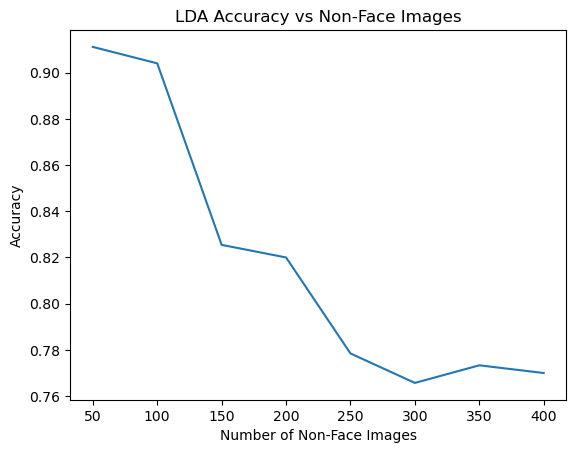

In [14]:
plt.plot( range( 50, len(nonface_data) + 1, 50 ), scores )
plt.xlabel( 'Number of Non-Face Images' )
plt.ylabel( 'Accuracy' )
plt.title( 'LDA Accuracy vs Non-Face Images' )
plt.show()

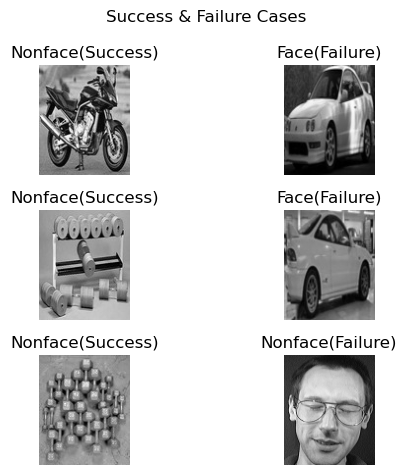

In [15]:
fig, axs = plt.subplots( 3, 2 )
success_count = 0
failure_count = 0

while success_count < 3 or failure_count < 3:

    # We randomly choose an image from the test set
    idx = np.random.randint( 0, len(test_set) - 1 )

    # We predict the label of the image
    prediction = knn.predict( new_test_set[idx].reshape( 1, -1 ) )

    # We plot 3 success cases and 3 failure cases. Success cases are on the left and failure cases are on the right
    if prediction == test_labels[idx]:
        if success_count == 3: continue
        i, j = success_count, 0
        success_count += 1

    elif failure_count < 3:
        i , j = failure_count, 1
        failure_count += 1
    
    else:
        continue

    axs[i, j].imshow( test_set[idx].reshape( 112, 92 ), cmap='gray' )
    axs[i, j].set_title( ('Face' if prediction == 1 else 'Nonface') + ('(Failure)' if prediction != test_labels[idx] else '(Success)') )
    axs[i, j].axis( 'off' )

fig.suptitle( 'Success & Failure Cases' )
fig.tight_layout()
plt.show()